In [ ]:
# import packages, libraries
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

!pip install mne
import mne

from scipy.signal import welch
import pywt
import scipy.io as sio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 69.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/dataset folder/all_32_deap.mat'
data = scipy.io.loadmat(data_path)

In [ ]:
variables = data.keys()
print(variables)

dict_keys(['__header__', '__version__', '__globals__', 'all_32_data-deap'])


In [ ]:
label_path = '/content/drive/MyDrive/dataset folder/final_labels_deap.mat'
label = scipy.io.loadmat(label_path)

In [ ]:
lvariables = label.keys()
print(lvariables)

dict_keys(['__header__', '__version__', '__globals__', 'valance', 'arousal', 'dominance', 'likelihood'])


In [ ]:
features = data['all_32_data-deap']
target = label['valance']
target2 =label['arousal']
target3 = label['dominance']
target4 = label['likelihood']

In [ ]:
type(target)

numpy.ndarray

In [ ]:
print(features.shape)
print(target.shape)

(1280, 416)
(1280,)


In [ ]:
print(target[44])
print(target2[51])
print(target4[500])
print(target3[47])

Low 
High
Low 
High


# feature selection :

In [ ]:
n_labels_path = '/content/drive/MyDrive/dataset folder/all_32_label_deap.mat'
n_labels = scipy.io.loadmat(n_labels_path)

In [ ]:
var =n_labels.keys()
print(var)

dict_keys(['__header__', '__version__', '__globals__', 'all_label_deap'])


In [ ]:
nm_labels = n_labels['all_label_deap']
print(nm_labels.shape)

(1280, 4)


In [ ]:
valance_label = nm_labels[ : , 0]
valance_label.shape

(1280,)

In [ ]:
X = features
y = target

# Anova :

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif


anova_selector = SelectKBest(score_func=f_classif, k=100)
X_selected = anova_selector.fit_transform(X, y)


In [ ]:
X_selected.shape

(1280, 100)

# KNN with selected features :

Accuracy: 0.5703125
Runtime: 0.0011565685272216797


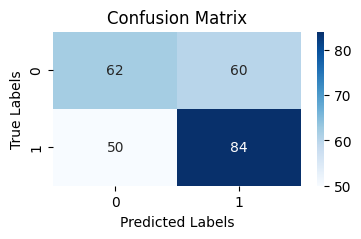

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import time


X = X_selected                                          #CHANGE THIS ACCORDINGLY
y = target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=25)
start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate runtime
runtime = end_time - start_time

# Print accuracy and runtime
print("Accuracy:", accuracy)
print("Runtime:", runtime)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# CLASSIFICATION : (extracted features )

# 1)without k-fold cv (random forest)

Accuracy: 0.578125
Runtime: 2.486962080001831 seconds


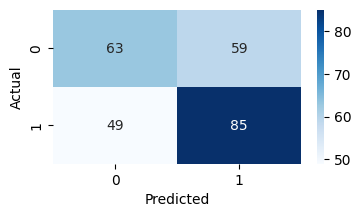

In [ ]:

from sklearn.ensemble import RandomForestClassifier


# Assuming your features are stored in X and labels in y
X = features
y = target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
clf = RandomForestClassifier()

# Train the classifier
start_time = time.time()
clf.fit(X_train, y_train)
end_time = time.time()

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate runtime
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# 2)With K-fold CV
(SVM , KNN , logistic regression , random forest)

# VALANCE :



SVM:
Cross-validation accuracy: 0.5492 ± 0.0413
Test accuracy: 0.6055



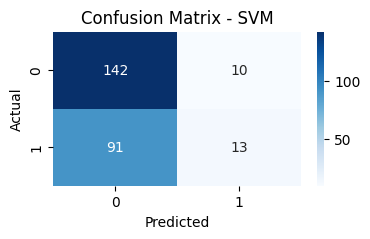

KNN:
Cross-validation accuracy: 0.5797 ± 0.0457
Test accuracy: 0.6289



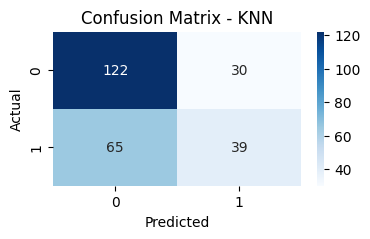

Logistic Regression:
Cross-validation accuracy: 0.5852 ± 0.0289
Test accuracy: 0.5586



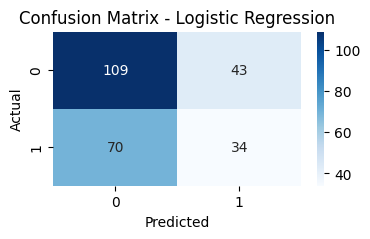

Random Forest:
Cross-validation accuracy: 0.6141 ± 0.0370
Test accuracy: 0.6016



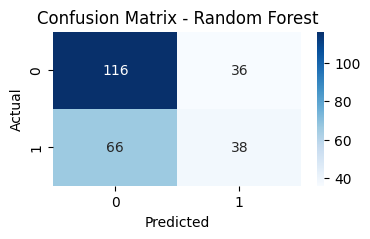

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Prepare the data
 # Replace with your actual feature data
labels = target  # Replace with your actual labels

# Normalize the feature data
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the data into train and test sets

#X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Define the classifiers
svm = SVC(max_iter=10000)  # Increase the maximum number of iterations
knn = KNeighborsClassifier()
logreg = LogisticRegression(max_iter=10000)  # Increase the maximum number of iterations
rf = RandomForestClassifier()

classifiers = [('SVM', svm), ('KNN', knn), ('Logistic Regression', logreg), ('Random Forest', rf)]

# Perform k-fold cross-validation and evaluate the models
num_folds = 10
results = []
runtimes = []

for name, clf in classifiers:
    kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    cv_results = cross_val_score(clf, features,target, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    runtimes.append(np.mean(cv_results))

    print(f'{name}:')
    print(f'Cross-validation accuracy: {np.mean(cv_results):.4f} ± {np.std(cv_results):.4f}')

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Test accuracy: {accuracy:.4f}\n')

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


# AROUSAL :

SVM:
Cross-validation accuracy: 0.6000 ± 0.0410
Test accuracy: 0.6055



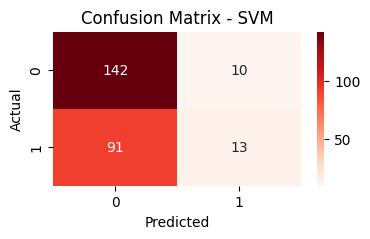

KNN:
Cross-validation accuracy: 0.5656 ± 0.0311
Test accuracy: 0.6289



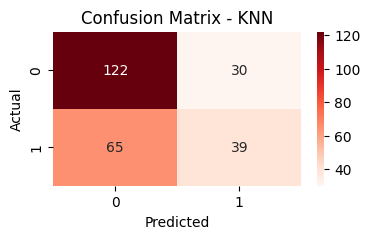

Logistic Regression:
Cross-validation accuracy: 0.6047 ± 0.0326
Test accuracy: 0.5586



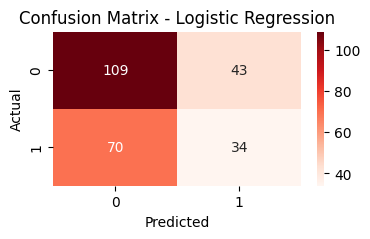

Random Forest:
Cross-validation accuracy: 0.6055 ± 0.0360
Test accuracy: 0.6133



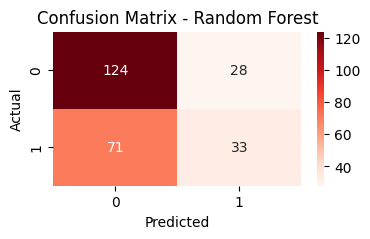

In [ ]:
labels = target2

# Normalize the feature data
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Define the classifiers
svm = SVC(max_iter=10000)  # Increase the maximum number of iterations
knn = KNeighborsClassifier()
logreg = LogisticRegression(max_iter=10000)  # Increase the maximum number of iterations
rf = RandomForestClassifier()

classifiers = [('SVM', svm), ('KNN', knn), ('Logistic Regression', logreg), ('Random Forest', rf)]

# Perform k-fold cross-validation and evaluate the models
num_folds = 10
results = []
runtimes = []

for name, clf in classifiers:
    kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    cv_results = cross_val_score(clf, features, labels, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    runtimes.append(np.mean(cv_results))

    print(f'{name}:')
    print(f'Cross-validation accuracy: {np.mean(cv_results):.4f} ± {np.std(cv_results):.4f}')

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Test accuracy: {accuracy:.4f}\n')

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


# DOMINANCE :

SVM:
Cross-validation accuracy: 0.6141 ± 0.0293
Test accuracy: 0.6055



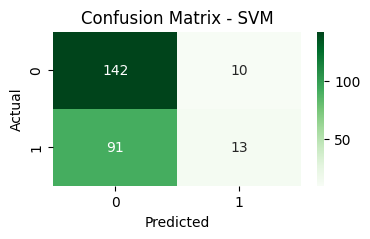

KNN:
Cross-validation accuracy: 0.5953 ± 0.0340
Test accuracy: 0.6289



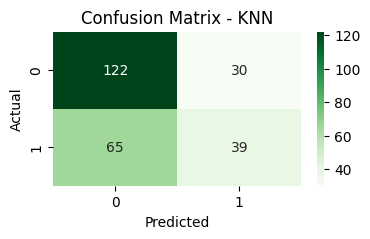

Logistic Regression:
Cross-validation accuracy: 0.5828 ± 0.0280
Test accuracy: 0.5586



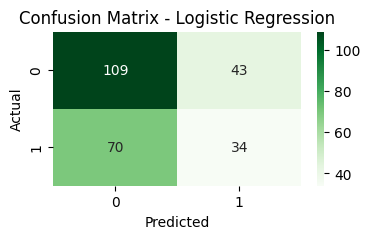

Random Forest:
Cross-validation accuracy: 0.6117 ± 0.0341
Test accuracy: 0.6016



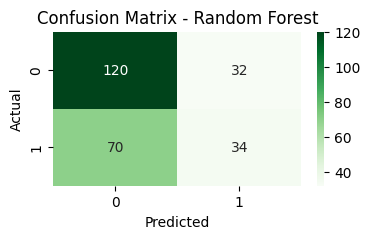

In [ ]:
labels = target3
# Normalize the feature data
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Define the classifiers
svm = SVC(max_iter=10000)  # Increase the maximum number of iterations
knn = KNeighborsClassifier()
logreg = LogisticRegression(max_iter=10000)  # Increase the maximum number of iterations
rf = RandomForestClassifier()

classifiers = [('SVM', svm), ('KNN', knn), ('Logistic Regression', logreg), ('Random Forest', rf)]

# Perform k-fold cross-validation and evaluate the models
num_folds = 10
results = []
runtimes = []

for name, clf in classifiers:
    kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    cv_results = cross_val_score(clf,features, labels, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    runtimes.append(np.mean(cv_results))

    print(f'{name}:')
    print(f'Cross-validation accuracy: {np.mean(cv_results):.4f} ± {np.std(cv_results):.4f}')

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Test accuracy: {accuracy:.4f}\n')

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


# Liklihood :

SVM:
Cross-validation accuracy: 0.6211 ± 0.0317
Test accuracy: 0.6055



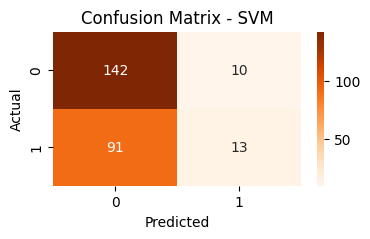

KNN:
Cross-validation accuracy: 0.5977 ± 0.0289
Test accuracy: 0.6289



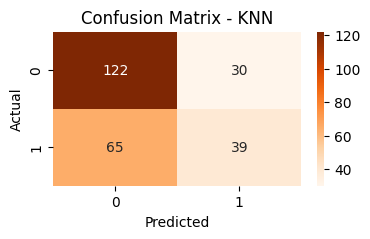

Logistic Regression:
Cross-validation accuracy: 0.6070 ± 0.0547
Test accuracy: 0.5586



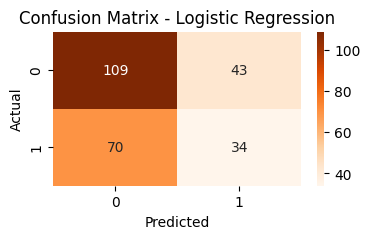

Random Forest:
Cross-validation accuracy: 0.6266 ± 0.0378
Test accuracy: 0.5781



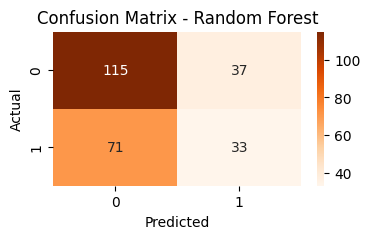

In [ ]:
labels = target4

# Normalize the feature data
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Define the classifiers
svm = SVC(max_iter=10000)  # Increase the maximum number of iterations
knn = KNeighborsClassifier()
logreg = LogisticRegression(max_iter=10000)  # Increase the maximum number of iterations
rf = RandomForestClassifier()

classifiers = [('SVM', svm), ('KNN', knn), ('Logistic Regression', logreg), ('Random Forest', rf)]

# Perform k-fold cross-validation and evaluate the models
num_folds = 10
results = []
runtimes = []

for name, clf in classifiers:
    kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    cv_results = cross_val_score(clf, features, labels, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    runtimes.append(np.mean(cv_results))

    print(f'{name}:')
    print(f'Cross-validation accuracy: {np.mean(cv_results):.4f} ± {np.std(cv_results):.4f}')

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Test accuracy: {accuracy:.4f}\n')

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
